# Customer churn prediction

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

/Users/muhammadshahzebali/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/muhammadshahzebali/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1


In [2]:
import numpy as np
import pandas as pd

In [3]:
import os

data_dir = "/Users/muhammadshahzebali/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1"
print(os.listdir(data_dir))


['Churn_Modelling.csv']


In [4]:

csv_path = "/Users/muhammadshahzebali/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1/Churn_Modelling.csv"
df = pd.read_csv(csv_path)

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.drop(columns= ['RowNumber','CustomerId','Surname'], inplace= True)

In [8]:
df.shape

(10000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True, dtype= int)


In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_dim=11))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/Users/muhammadshahzebali/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,359 (13.12 KB)

 Trainable params: 3,359 (13.12 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [19]:
history = model.fit(X_train_trf,y_train,batch_size=250,epochs=100,verbose=1,validation_split=0.2)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2151 - loss: 0.9607 - val_accuracy: 0.8006 - val_loss: 0.6755
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7928 - loss: 0.6285 - val_accuracy: 0.7969 - val_loss: 0.5382
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8037 - loss: 0.5225 - val_accuracy: 0.7969 - val_loss: 0.5072
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7957 - loss: 0.5061 - val_accuracy: 0.7969 - val_loss: 0.5002
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7973 - loss: 0.4987 - val_accuracy: 0.7969 - val_loss: 0.4975
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8008 - loss: 0.4915 - val_accuracy: 0.7969 - val_loss: 0.4952
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4908 - val_accuracy: 0.7969 - val_loss: 0.4927
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7943 - loss: 0.4949 - val_accuracy: 0.7969 - v

In [20]:
model.layers[2].get_weights()

[array([[-0.09690385, -0.48008555,  0.46085218,  0.3633686 ,  0.30500266,
         -0.46325663, -0.1795322 , -0.06257335,  0.10993175,  0.05090739,
         -0.35314518,  0.3340575 ,  0.42005166,  0.17242819,  0.24289595],
        [ 0.16016947, -0.3613473 ,  0.12066087,  0.3286035 , -0.11074643,
         -0.1467443 ,  0.15508993, -0.23241478, -0.40761054, -0.35344407,
         -0.2527371 , -0.02026711, -0.02474887,  0.10709026,  0.13186383],
        [ 0.063659  , -0.601553  ,  0.06232841,  0.46839777, -0.04217335,
         -0.8639412 , -0.4289634 , -0.48099253, -0.19397227, -0.4964696 ,
         -0.36482707,  0.64484876,  0.09263109,  0.57229257,  0.6064825 ],
        [-0.16221932,  0.06212233, -0.3227916 , -0.16326325, -0.03688551,
          0.08655178,  0.35803854,  0.2816076 , -0.03030339,  0.43565944,
          0.40102312, -0.24921599, -0.20100622, -0.3375271 , -0.27402255],
        [ 0.19413567, -0.6635518 ,  0.23503019,  0.08089514,  0.22502597,
         -0.16607562, -0.20732582,

In [21]:
y_log = model.predict(X_test_trf)
y_log


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


array([[0.23666479],
       [0.37081426],
       [0.17276675],
       ...,
       [0.11618648],
       [0.16064821],
       [0.22717491]], dtype=float32)

In [22]:
y_pred = np.where(y_log > 0.5,1,0)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

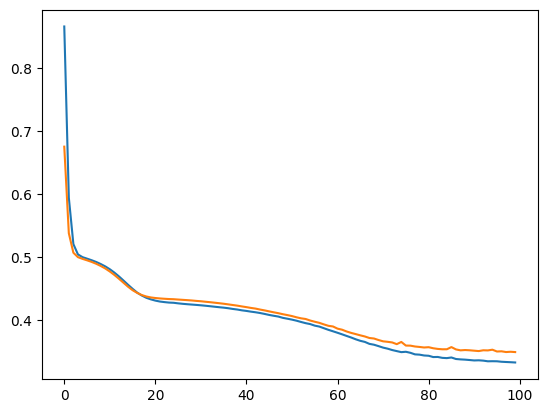

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

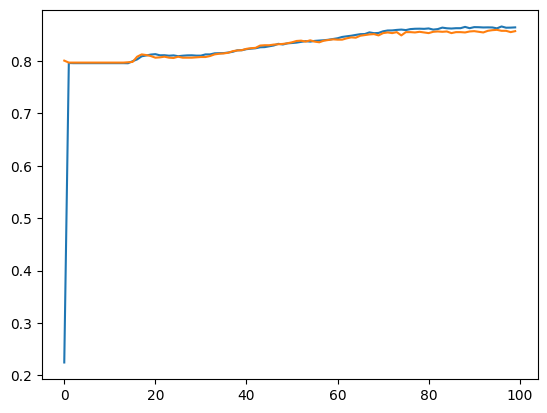

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])